# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (13)

**12/12/2022**

## Análisis de calidad del aire


En los últimos años, los **altos niveles de contaminación** durante ciertos periodos secos en **Madrid** ha obligado a las autoridades a tomar medidas contra el uso de automóviles en el centro de la ciudad, y ha sido utilizado como razón para **proponer modificaciones drásticas en el urbanismo de la ciudad**. 

Gracias a la **web de [Datos Abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.400a817358ce98c34e937436a8a409a0/?vgnextoid=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**, los datos de calidad del aire están públicamente disponibles e incluyen **datos históricos diarios y horarios de los niveles registrados desde 2001 hasta 2018** y la lista de estaciones que se utilizan para el análisis de contaminación.

Vamos a utilizar **una muestra** que se ha preparado en base a estos datos que muestran la **calidad del aire** en varias estaciones de **Madrid** según diferentes variables.

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos para el modelo

In [3]:
# Cargar el dataset desde un archivo

df_aire = pd.read_excel("ABT_CALIDAD_AIRE.xlsx")

In [4]:
# Consultar los registros del DataFrame
df_aire

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
0,4,Pza. de España,635,UT,01OCT17:00:00:00,77.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,0,1
1,4,Pza. de España,635,UT,01OCT17:01:00:00,34.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,1,1
2,4,Pza. de España,635,UT,01OCT17:02:00:00,26.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,2,1
3,4,Pza. de España,635,UT,01OCT17:03:00:00,18.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,3,1
4,4,Pza. de España,635,UT,01OCT17:04:00:00,12.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69616,47,Mendez Alvaro,599,UF,22FEB18:16:00:00,33.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,16,5
69617,47,Mendez Alvaro,599,UF,22FEB18:17:00:00,28.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,17,5
69618,47,Mendez Alvaro,599,UF,22FEB18:18:00:00,37.0,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,2,22,18,5
69619,47,Mendez Alvaro,599,UF,22FEB18:19:00:00,49.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,19,5


In [5]:
# Conteo de valores perdidos/faltantes  
df_aire.isna().sum()

id_pto_calidad      0
nombre_estacion     0
ALTITUD             0
tipo_estacion_id    0
fecha               0
                   ..
anyo                0
mes                 0
dia                 0
hora                0
diasemana           0
Length: 86, dtype: int64

In [6]:
# La información útil sobre los datos guardados en formato DataFrame
df_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69621 entries, 0 to 69620
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pto_calidad                69621 non-null  int64  
 1   nombre_estacion               69621 non-null  object 
 2   ALTITUD                       69621 non-null  int64  
 3   tipo_estacion_id              69621 non-null  object 
 4   fecha                         69621 non-null  object 
 5   Calidad_NO2                   69307 non-null  float64
 6   Pto_trafico2                  66741 non-null  float64
 7   Pto_trafico1                  66741 non-null  float64
 8   Pto_trafico4                  69621 non-null  int64  
 9   Pto_trafico5                  69621 non-null  int64  
 10  Pto_trafico3                  69621 non-null  int64  
 11  Distancia_Pto_trafico2        66741 non-null  float64
 12  Distancia_Pto_trafico1        66741 non-null  float64
 13  D

In [7]:
# Consultar los valores nulos
df_aire['Intensidad_Pto_trafico1'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
69616    False
69617    False
69618    False
69619    False
69620    False
Name: Intensidad_Pto_trafico1, Length: 69621, dtype: bool

In [8]:
# Contar los valores nulos para este campo
df_aire['Intensidad_Pto_trafico1'].isna().sum()

10187

In [9]:
# Mostrar los valores nulos para este campo
df_aire['Intensidad_Pto_trafico1'][df_aire['Intensidad_Pto_trafico1'].isna()]

1577    NaN
1578    NaN
1579    NaN
1580    NaN
1581    NaN
         ..
67801   NaN
67802   NaN
67803   NaN
67804   NaN
67899   NaN
Name: Intensidad_Pto_trafico1, Length: 10187, dtype: float64

In [10]:
# Sacar los registros que contienen valores nulos para este campo
df_aire[67801:67901][['Intensidad_Pto_trafico1', 'nombre_estacion', 'anyo','mes', 'dia', 'hora']]

,Intensidad_Pto_trafico1,nombre_estacion,anyo,mes,dia,hora
67801,NaN,Mendez Alvaro,2017,12,9,1
67802,NaN,Mendez Alvaro,2017,12,9,2
67803,NaN,Mendez Alvaro,2017,12,9,3
67804,NaN,Mendez Alvaro,2017,12,9,4
67805,21.0,Mendez Alvaro,2017,12,9,5
...,...,...,...,...,...,...
67896,118.0,Mendez Alvaro,2017,12,13,0
67897,64.0,Mendez Alvaro,2017,12,13,1
67898,27.0,Mendez Alvaro,2017,12,13,2
67899,NaN,Mendez Alvaro,2017,12,13,3


In [11]:
# Consultamos los registros que tienen algún valor nulo
df_aire.drop(df_aire.dropna().index)

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
36,4,Pza. de España,635,UT,02OCT17:12:00:00,NaN,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,2,12,2
255,4,Pza. de España,635,UT,11OCT17:15:00:00,83.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,15,4
258,4,Pza. de España,635,UT,11OCT17:18:00:00,48.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,18,4
259,4,Pza. de España,635,UT,11OCT17:19:00:00,69.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,19,4
260,4,Pza. de España,635,UT,11OCT17:20:00:00,148.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68096,47,Mendez Alvaro,599,UF,21DEC17:08:00:00,66.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2017,12,21,8,5
68391,47,Mendez Alvaro,599,UF,02JAN18:15:00:00,NaN,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,1,2,15,3
68770,47,Mendez Alvaro,599,UF,18JAN18:10:00:00,NaN,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,1,18,10,5
69058,47,Mendez Alvaro,599,UF,30JAN18:10:00:00,NaN,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,1,30,10,3


In [12]:
# El tamaño esperado para el dataset limpio
df_aire.shape[0] - 20367 

49254

Para evitar problemas posteriores, usamos el método ``dropna()`` para limpiar el tablón de valores perdidos (**missing values**) y reiniciamos el índice. Comprobamos la cantidad de las filas filtradas.

In [13]:
df_air_filt = df_aire.dropna().reset_index(drop=True)
df_air_filt

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
0,4,Pza. de España,635,UT,01OCT17:00:00:00,77.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,0,1
1,4,Pza. de España,635,UT,01OCT17:01:00:00,34.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,1,1
2,4,Pza. de España,635,UT,01OCT17:02:00:00,26.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,2,1
3,4,Pza. de España,635,UT,01OCT17:03:00:00,18.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,3,1
4,4,Pza. de España,635,UT,01OCT17:04:00:00,12.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,47,Mendez Alvaro,599,UF,22FEB18:16:00:00,33.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,16,5
49250,47,Mendez Alvaro,599,UF,22FEB18:17:00:00,28.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,17,5
49251,47,Mendez Alvaro,599,UF,22FEB18:18:00:00,37.0,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,2,22,18,5
49252,47,Mendez Alvaro,599,UF,22FEB18:19:00:00,49.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,19,5


### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [14]:
# Echamos un vistazo a las características de cada columna
df_air_filt.describe()

,id_pto_calidad,ALTITUD,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,Pto_trafico3,Distancia_Pto_trafico2,Distancia_Pto_trafico1,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.0,49254.0,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000
mean,25.081313,661.735027,50.807569,4682.953709,4790.309254,4777.733991,4827.549823,5123.458196,170.874872,140.003163,...,6.891907,0.0,0.0,9.746965,0.037276,2017.599748,5.857250,15.798656,11.479433,3.972429
std,14.313100,34.497321,33.862609,1081.989123,732.346221,781.088766,1050.020287,1380.068057,109.234667,98.958425,...,18.427739,0.0,0.0,1.833177,0.189440,0.489954,4.334602,8.726627,6.935243,2.008118
min,4.000000,599.000000,1.000000,3395.000000,3911.000000,3775.000000,3408.000000,3411.000000,69.206842,48.351595,...,0.000000,0.0,0.0,2.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,1.000000
25%,11.000000,635.000000,25.000000,3731.000000,4129.000000,4127.000000,4022.000000,3791.000000,86.991002,71.219285,...,0.000000,0.0,0.0,10.000000,0.000000,2017.000000,2.000000,8.000000,5.000000,2.000000
50%,18.000000,670.000000,45.000000,4556.000000,4472.000000,4333.000000,4336.000000,4555.000000,151.329747,86.018742,...,1.000000,0.0,0.0,10.000000,0.000000,2018.000000,4.000000,16.000000,11.000000,4.000000
75%,38.000000,693.000000,69.000000,5783.000000,5414.000000,5437.000000,5777.000000,7001.000000,192.721278,168.527832,...,1.000000,0.0,0.0,10.000000,0.000000,2018.000000,11.000000,23.000000,17.000000,6.000000
max,47.000000,708.000000,349.000000,7004.000000,6118.000000,6117.000000,7003.000000,7098.000000,432.784314,407.571507,...,94.000000,0.0,0.0,20.000000,1.000000,2018.000000,12.000000,31.000000,23.000000,7.000000


In [15]:
# Consultamos el tipo de datos
df_air_filt.dtypes

id_pto_calidad       int64
nombre_estacion     object
ALTITUD              int64
tipo_estacion_id    object
fecha               object
                     ...  
anyo                 int64
mes                  int64
dia                  int64
hora                 int64
diasemana            int64
Length: 86, dtype: object

Los algoritmos **entienden de números y no otra cosa!**, con lo cual para que el algoritmo pueda trabajar con toda la información del dataset, los datos se tienen que **transformar en valores numéricos**.

In [16]:
# Consultar las variables que son del tipo "string"
df_air_filt.dtypes[df_air_filt.dtypes=='object']

nombre_estacion     object
tipo_estacion_id    object
fecha               object
wind_dir            object
dtype: object

Salvo la variable `wind_dir` que indica un parámetro meteorológico y lo tendrémos que tratar como una variable categórica más adelante, el resto se pueden quitar por no ser tan relevante.

In [17]:
# Analizar las direcciones del tiempo
df_air_filt['wind_dir'].value_counts()

WSW    7982
SW     6616
NE     4130
W      3589
NNE    3480
WNW    3221
ENE    2924
SSW    2663
N      2313
NNW    2281
NW     2172
ESE    2039
E      2011
SE     1576
S      1284
SSE     973
Name: wind_dir, dtype: int64

Se observa que en el conjunto de datos existen datos **no tan descriptivos** como el **nombre de la estación** y alguna información asociada a estas estaciones como puede ser el **año** o el **tipo de estación**. 

In [18]:
# Datos informativos
df_air_filt['id_pto_calidad'].value_counts()

38    4926
4     4872
11    4697
8     4695
17    4619
39    4525
35    4361
36    4028
47    3375
18    3165
40    3140
16    2851
Name: id_pto_calidad, dtype: int64

In [19]:
# Datos informativos
df_air_filt['Pto_trafico4'].value_counts()

5778    4926
4333    4872
3917    4697
4026    4695
4845    4619
5437    4525
4301    4361
6117    4028
4127    3375
4756    3165
5837    3140
3775    2851
Name: Pto_trafico4, dtype: int64

En la lista ``columnas_drop`` definimos las columnas a eliminar del dataset por ser meramente informativas.

In [20]:
columnas_drop= ["Pto_trafico1",
                "Pto_trafico2",
                "Pto_trafico3",
                "Pto_trafico4",
                "Pto_trafico5",
                "Pto_trafico5",
                "anyo",
                "id_pto_calidad",
                "nombre_estacion",
                "tipo_estacion_id",
                "fecha"]

Creamos un nuevo dataset que sea como el tablón anterior, eliminando las columnas de la lista indicada. Utilizamos el método `drop` para _DataFrames_ de _pandas_.

In [21]:
df_air_filt2 = df_air_filt.drop(columns=columnas_drop)
print("Tamaño del tablón filtrado: ", df_air_filt.shape)
print("Tamaño del tablón nuevo: ", df_air_filt2.shape)

Tamaño del tablón filtrado:  (49254, 86)
Tamaño del tablón nuevo:  (49254, 76)


In [22]:
# Tipología de las variables exsitentes en el nuevo dataset
df_air_filt2.dtypes.value_counts()

float64    60
int64      15
object      1
dtype: int64

Vamos a analizar el caso de la única variable todavía no-numérica (`wind_dir`) que necesita un tratamiento concreto. _sklearn_ posee directamente métodos para convertir estas variables en numéricas. Así, tenemos:  

* ``sklearn.preprocessing.LabelEncoder``: Recibe un array de strings o enteros y nos devuelve uno de enteros con valores comprendidos **entre _0_ y _n-1_**, donde **_n_ es el número total de categorías** de la variable.  

* El problema de _LabelEncoder_ es que para más de dos clases, el algoritmo podrá entender que seguimos teniendo una relación de orden entre los datos, es decir: Una variable categórica que por ejemplo recoja puntos cardinales (N,S,E,O) indica diferentes valores pero el norte no es de mayor ni menor importancia que el oeste. Simplemente, es distinto. Si aplicamos el método _LabelEncoder_ nos devolverá un array con valores entre (0,1,2,3). En algunos casos y **algunos algoritmos pueden deducir que en estos datos existe una relación de orden**, lo cual no es cierto.  

* Para evitar este problema, se recurre a ``sklearn.preprocessing.OneHotEncoder``. Este **genera _n-1_ variables "dummies" o binarias**, es decir, que toman valores (0,1). Aquí ya se evita el que pueda inferirse un orden en las categorías, pues aquí sí que la variable significa _1== "es norte"_ y _0 =="no es norte"_ y así sucesivamente.  
El problema que se presenta en este caso, es que **si tenemos muchas variables categóricas con muchas tipologías y clases, al convertirlas en binarias, se nos aumenta notablemente el tamaño del dataset**.

En nuestro dataset hemos visto que hay una variable llamada **"wind_dir"** que indica la dirección del viento. Esta variable tiene 16 categorías:  
- 'NE'  
- 'ENE'  
- 'E'
- 'ESE'
- 'SE'
- 'SSE'
- 'S'
- 'SSW'
- 'SW'
- 'WSW'
- 'W'
- 'NNE'
- 'N'
- 'WNW'
- 'NW'
- 'NNW'

Primero vamos a **agruparlas en cuatro grupos de (N,S,E,O)** y después convertirlas en valres numéricos.

In [23]:
# La variable de dirección de viento que se requiere agrupar y posteriormente convertirse en números
df_air_filt2['wind_dir'].value_counts()

WSW    7982
SW     6616
NE     4130
W      3589
NNE    3480
WNW    3221
ENE    2924
SSW    2663
N      2313
NNW    2281
NW     2172
ESE    2039
E      2011
SE     1576
S      1284
SSE     973
Name: wind_dir, dtype: int64

In [24]:
# Utilizamos estas listas como categorías para poder agruparlos posteriormente
norte = ['NNE','NNW','NE','N']
sur = ['SSE','SSW','SW','S']
este = ['ENE','ESE','SE','E']
oeste = ['WNW','WSW','NW','W']

In [25]:
# Creamos una nueva columna en una nueva DataFrame con los datos agrupados
df_air_filt3 = df_air_filt2.copy()
df_air_filt3['wind_dir'] = df_air_filt3['wind_dir'].apply(lambda x: "N" if x in norte else
                                                                    "S" if x in sur else
                                                                    "O" if x in oeste else "E")

In [26]:
# Consultamos los nuevos valores reemplazados
df_air_filt3['wind_dir'].value_counts()

O    16964
N    12204
S    11536
E     8550
Name: wind_dir, dtype: int64

In [27]:
# Comprobamos que están todas las celdas bien agrupadas
df_air_filt3.groupby('wind_dir').count()['mes']

wind_dir
E     8550
N    12204
O    16964
S    11536
Name: mes, dtype: int64

Una vez que tenemos ya la columna actualizada, vamos a utilizar los __encoders__ de _sklearn_ para transformarlos. Para no añadir más columnas al dataset procedemos con el método _LabelEncoder_:
* La función ``sklearn.preprocessing.LabelEncoder`` codifica las etiquetas de una variable categórica en valores numéricos **entre 0 y el número de clases menos 1**.  

* Una vez instanciado el encoder, el método ``fit`` lo entrena, **creando el mapeado entre las etiquetas y los números** según las distintas categorías presentes en dicha variable.   

* El método ``transform`` asigna para cada etiqueta los números correspondientes, **aplicando el mapeado** creado en el paso anterior.  

* El método ``fit_transform`` realiza **ambas acciones conjuntamente**.  

In [28]:
from sklearn.preprocessing import LabelEncoder
etiquetado = LabelEncoder()
etiquetado.fit(df_air_filt3['wind_dir'])

LabelEncoder()

Un atributo de esta función llamado ``classes_`` almacena **el array que mapea las etiquetas** y asigna los números según el índice de cada etiqueta en el array.

In [29]:
# Obtenemos las propiedades:
etiquetado.classes_

array(['E', 'N', 'O', 'S'], dtype=object)

In [30]:
# Transformamos el dataset aplicando el mapeado:
etiquetado.transform(df_air_filt3['wind_dir'])

array([1, 1, 1, ..., 1, 3, 0])

Se ve que al aplicar el mapeado con el método _transform_ obtenemos un array de numpy de tipo enteros. Vamos a añadir en **una nueva columna** llamada **'Dir_viento_etiquetado'** con estos valores númericos y consultamos si existe una relación entre la columna `wind_dir` y esta nueva columna de `Dir_viento_etiquetado` antes de borrar los datos no-numéricos.


In [31]:
# Asignar una nueva columna
df_air_filt3['Dir_viento_etiquetado'] = etiquetado.transform(df_air_filt3['wind_dir'])

# mostrar la relación con el dato original
df_air_filt3.groupby(['wind_dir','Dir_viento_etiquetado']).count()[['mes']]

,,mes
wind_dir,Dir_viento_etiquetado,
E,0,8550
N,1,12204
O,2,16964
S,3,11536


In [32]:
# Definimos un nuevo dataframe con solamente datos transformados a valores numéricos
df_air_filt4 = df_air_filt3.drop('wind_dir', axis='columns')

# Consultar el tipo de las variables
df_air_filt4.dtypes.value_counts()

float64    60
int64      15
int32       1
dtype: int64

### **Reducción de Variables (_Dimensionality Reduction_)**

Existen muchos métodos de reducción de variables existentes en _sklearn_.

- #### **Filtro por varianza**: 

Se define un umbral de varianza usando ``from sklearn.feature_selection import VarianceThreshold`` y todas las variables que no lo cumplan se eliminan. **Muy útil para eliminar variables que son casi constantes**. Dispone de los métodos`` fit`` y ``transform`` para aplicar a un dataset. 

El problema es que devuelve un array con las variables no eliminadas y puede que no resulte sencillo rastrear cuáles ha eliminado. Normalmente hay que ir comparando columna a columna en el dataframe original y el array para ver cuáles ha eliminado y cuáles no.


- #### **Filtros univariantes basados en una clasificación de p-values**.

Según el modelo sea de clasificación o de regresión, se aplica un **test estadístico (_chi cuadrado_, _anova_ respectivametne)** y tras indicar con cuántas variables queremos quedarnos, se crea una clasificación de variables y el modelo selecciona las _k_ con los _p-valores_ menores con mayor grado de independencia entre variables.


- #### **Selección basada en árbol de decisión (_Decision Trees Importances_)**.

Consiste en **entrenar un árbol de decisión muy sobreajustado** sobre todo el dataset y después quedarse con las variables que expliquen un valor determinado de la información: 90%, 95 %....

Este método utiliza un modelo y como veremos más adelante, todos los modelos de sklearn tienen los siguientes métodos:  
  - ``.fit(X=conjunto de train de variables independientes, y=variable objetivo del conjunto de train)``  
  - ``.predict(X=conjunto de variables independientes)``. Siempre tiene que tener las mismas variables que el que se utilizó para el .fit()  
  - ``.score(y_real, y_predicción)`` Devuelve, **para el caso de regresión el $R^2$** del modelo y **para clasificación el accuracy** entendida como el porcentaje de aciertos sobre el total.

- #### **Selección basada en métodos recursivos**.
Este caso funciona de modo similar a como lo hacen las regresiones "_backward_", es decir, se comienza probando todas las variables para ir sacando variables una a una. 

### Importancia de variables

Definimos el conjunto de las variables de entrada (_variables independientes_) y la variable objetivo (`Calidad_NO2`), y almacenamos esta última en una variable llamada `target`.

Importamos desde la librería _sklearn_ la clase para el _árbol de regresión_. Y procedemos a entrenar uno con todo el dataset y así obtener las variables más importantes.

In [33]:
# Generar la lista de features y la variable target
target = 'Calidad_NO2'
features = [x for x in df_air_filt4.columns if x!=target]

print(target)
print(features)

Calidad_NO2
['ALTITUD', 'Distancia_Pto_trafico2', 'Distancia_Pto_trafico1', 'Distancia_Pto_trafico4', 'Distancia_Pto_trafico5', 'Distancia_Pto_trafico3', 'Intensidad_Pto_trafico1', 'Intensidad_Pto_trafico2', 'Intensidad_Pto_trafico3', 'Intensidad_Pto_trafico4', 'Intensidad_Pto_trafico5', 'Carga_Pto_trafico2', 'Carga_Pto_trafico1', 'Carga_Pto_trafico4', 'Carga_Pto_trafico5', 'Carga_Pto_trafico3', 'Intensidad_mediaR1_500', 'Intensidad_mediaR2_500_750', 'Intensidad_mediaR3_750_1000', 'Intensidad_mediaR4_1000_1500', 'Intensidad_mediaR5_1500_2000', 'Intensidad_mediaR6_2000', 'Intensidad_minR1_500', 'Intensidad_minR2_500_750', 'Intensidad_minR3_750_1000', 'Intensidad_minR4_1000_1500', 'Intensidad_minR5_1500_2000', 'Intensidad_minR6_2000', 'Intensidad_maxR1_500', 'Intensidad_maxR2_500_750', 'Intensidad_maxR3_750_1000', 'Intensidad_maxR4_1000_1500', 'Intensidad_maxR5_1500_2000', 'Intensidad_maxR6_2000', 'Carga_mediaR1_500', 'Carga_mediaR2_500_750', 'Carga_mediaR3_750_1000', 'Carga_mediaR4_1000

In [34]:
# Consultar la variable de salida
df_air_filt4[target]

0        77.0
1        34.0
2        26.0
3        18.0
4        12.0
         ... 
49249    33.0
49250    28.0
49251    37.0
49252    49.0
49253    69.0
Name: Calidad_NO2, Length: 49254, dtype: float64

In [35]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_air_filt4[features], y=df_air_filt4[target])

DecisionTreeRegressor(max_depth=85, random_state=100)

In [36]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_air_filt4[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_air_filt4[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_air_filt4[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_air_filt4[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_air_filt4[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_air_filt4[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


El modelo consigue un rendimiento perfecto!! Ahora vamos a sacar **las variables más importantes** que ha detectado el modelo. El **árbol devuelve la importancia de cada una de ellas** en el orden en el que están las columnas en el dataframe. 

In [37]:
# Importancias de cada variable en el árbol ajustado (Gini importance)
arbol_importancia.feature_importances_

array([5.78163143e-03, 8.04938769e-04, 5.44098706e-03, 1.50786432e-03,
       2.66724686e-03, 1.16465757e-03, 7.67561386e-03, 3.18520872e-03,
       5.91213112e-03, 4.69569266e-03, 3.80539442e-03, 2.50096507e-03,
       2.84346300e-03, 4.79964557e-03, 2.23039688e-03, 4.40033948e-03,
       3.15211751e-03, 2.94962989e-03, 1.90435772e-02, 2.56158233e-03,
       2.48237387e-03, 4.70938083e-02, 4.11899693e-03, 2.98954622e-03,
       3.09670295e-03, 2.96708711e-03, 2.23720971e-03, 3.09501046e-04,
       2.96651661e-03, 3.48301914e-03, 3.08023789e-03, 4.61120403e-03,
       6.46565582e-03, 1.32903198e-02, 3.58631068e-03, 3.61907995e-03,
       5.01615807e-02, 3.43668346e-03, 3.97016144e-03, 1.58063078e-02,
       2.30510457e-03, 1.55769684e-03, 1.50244215e-03, 4.02858239e-03,
       1.49018634e-03, 0.00000000e+00, 2.78837747e-03, 2.89562350e-03,
       2.95020785e-03, 3.45650092e-03, 3.99469172e-03, 2.82719498e-03,
       6.95689753e-03, 7.90456687e-03, 2.17372165e-01, 2.14843538e-02,
      

Se observa que el método ``feature_importances_`` devuelve un array con la importancia en tanto por uno. Para asociarlos, podemos crear una serie con los índices de las variables y al lado la importancia.

In [38]:
# Creamos un DataFrame con los datos de importancia
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
wind_kph,0.217372
hora,0.176578
humidity,0.072744
Carga_mediaR3_750_1000,0.050162
Intensidad_mediaR6_2000,0.047094
...,...
Intensidad_minR6_2000,0.000310
will_it_rain,0.000020
will_it_snow,0.000000
chance_of_snow,0.000000


Podemos obtener una lista con **las variables que aglutinan el 85% de la información**. Procedemos a añadir al DataFrame "_importancia_" que hemos creado en el caso anterior **la columna `imp_acum` que acumule la suma**.

In [39]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
wind_kph,0.217372,0.217372
hora,0.176578,0.393950
humidity,0.072744,0.466693
Carga_mediaR3_750_1000,0.050162,0.516855
Intensidad_mediaR6_2000,0.047094,0.563949
...,...,...
Intensidad_minR6_2000,0.000310,0.999980
will_it_rain,0.000020,1.000000
will_it_snow,0.000000,1.000000
chance_of_snow,0.000000,1.000000


In [40]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.85]

,Importancia,imp_acum
wind_kph,0.217372,0.217372
hora,0.176578,0.393950
humidity,0.072744,0.466693
Carga_mediaR3_750_1000,0.050162,0.516855
Intensidad_mediaR6_2000,0.047094,0.563949
dewpoint_c,0.040655,0.604604
dia,0.033287,0.637891
mes,0.029145,0.667036
pressure_mb,0.027457,0.694493
wind_degree,0.021484,0.715978


In [41]:
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 85% de la información necesaria
variables = importancia.loc[importancia['imp_acum']>0.85].index.to_list()
print(variables)

['Intensidad_maxR5_1500_2000', 'Intensidad_Pto_trafico3', 'ALTITUD', 'Distancia_Pto_trafico1', 'windchill_c', 'Carga_Pto_trafico4', 'Intensidad_Pto_trafico4', 'Intensidad_maxR4_1000_1500', 'Carga_Pto_trafico3', 'Intensidad_minR1_500', 'Carga_minR4_1000_1500', 'Carga_maxR5_1500_2000', 'Carga_mediaR5_1500_2000', 'Intensidad_Pto_trafico5', 'Carga_mediaR2_500_750', 'Carga_mediaR1_500', 'Intensidad_maxR2_500_750', 'Carga_maxR4_1000_1500', 'Carga_mediaR4_1000_1500', 'Intensidad_Pto_trafico2', 'Intensidad_mediaR1_500', 'Intensidad_minR3_750_1000', 'Intensidad_maxR3_750_1000', 'Intensidad_minR2_500_750', 'precip_mm', 'Intensidad_minR4_1000_1500', 'Intensidad_maxR1_500', 'Carga_maxR3_750_1000', 'Intensidad_mediaR2_500_750', 'Carga_maxR2_500_750', 'Carga_Pto_trafico1', 'Carga_maxR6_2000', 'Carga_maxR1_500', 'Distancia_Pto_trafico5', 'Intensidad_mediaR4_1000_1500', 'Carga_Pto_trafico2', 'Intensidad_mediaR5_1500_2000', 'Carga_minR1_500', 'Intensidad_minR5_1500_2000', 'Carga_Pto_trafico5', 'vis_km'

In [77]:
print(len(variables))

29


In [42]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(variables))

Variables iniciales:  75
Variables no importantes (a eliminar):  54


Ahora podemos filtrar el tablón para quedarnos solamente con las variables más importantes.

In [43]:
df_air_filt5 = df_air_filt4.drop(labels=variables, axis='columns')
df_air_filt5

,Calidad_NO2,Intensidad_Pto_trafico1,Intensidad_mediaR3_750_1000,Intensidad_mediaR6_2000,Intensidad_maxR6_2000,Carga_mediaR3_750_1000,Carga_mediaR6_2000,temp_c,is_day,wind_kph,...,humidity,cloud,feelslike_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,77.0,154.00,451.080645,273.702109,3600.00,15.596774,12.633799,21.0,0,17.6,...,53,0,21.0,21.0,10.9,10,1,0,1,1
1,34.0,159.00,466.048387,252.416544,3093.00,16.629032,11.465583,20.6,0,17.3,...,55,0,20.6,20.6,11.1,10,1,1,1,1
2,26.0,111.00,382.838710,187.846972,2370.00,15.483871,8.833383,20.1,0,16.9,...,57,0,20.1,20.1,11.2,10,1,2,1,1
3,18.0,70.00,303.516129,140.265125,3140.00,12.387097,6.771056,19.7,0,16.6,...,59,0,19.7,19.7,11.4,10,1,3,1,1
4,12.0,66.00,229.629032,109.303933,3145.00,10.048387,5.147199,19.5,0,15.1,...,59,11,19.5,19.5,11.2,10,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,33.0,521.75,648.805556,712.624906,7460.00,25.623264,33.087913,12.1,1,11.3,...,26,5,11.0,12.1,-7.0,2,22,16,5,1
49250,28.0,497.00,722.546875,754.248702,7662.25,28.618056,36.503706,11.0,1,13.2,...,29,5,9.4,11.0,-6.6,2,22,17,5,1
49251,37.0,559.75,804.135417,768.219027,6959.75,30.802083,37.416053,9.8,1,15.1,...,32,5,7.7,9.8,-6.2,2,22,18,5,1
49252,49.0,518.50,801.468750,772.618101,7014.75,30.453125,37.853477,8.8,1,14.4,...,35,5,6.6,8.8,-5.9,2,22,19,5,3


### **Planteamiento del ejercicio de clasificación**

Vamos a crear una variable objetivo de nombre ***Escenario*** con 2 clases como 0,1 del modo que:  

* El **nivel 0** se corresponda a los valores **por debajo del percentil 33** de la variable _target_ (`Calidad_NO2`).    
* El **nivel 1** se corresponde a los valores **por encima del percentil 33**.  

Eliminamos después la columna `Calidad_NO2` del nuevo dataset y procedemos a dividir el datset en conjuntos de train y test (usualmente con un reparto de 80% - 20%).  

**Vamos a intentar predecir si la calidad de aire de las distintas zonas está en el nivel 0, 1.**


In [44]:
# Hacemos una copia del tablón filtrado para no trabajar sobre original
df_aire_calidad = df_air_filt5.copy()

In [45]:
# Crear la columna nueva "Escenario" y borrar la columna target antigua 'Calidad_NO2'
df_aire_calidad["Escenario"] = np.where(df_aire_calidad['Calidad_NO2']<df_aire_calidad['Calidad_NO2'].quantile(0.33),0,1)

df_aire_calidad.drop(['Calidad_NO2'], axis='columns', inplace=True)
df_aire_calidad

,Intensidad_Pto_trafico1,Intensidad_mediaR3_750_1000,Intensidad_mediaR6_2000,Intensidad_maxR6_2000,Carga_mediaR3_750_1000,Carga_mediaR6_2000,temp_c,is_day,wind_kph,wind_degree,...,cloud,feelslike_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
0,154.00,451.080645,273.702109,3600.00,15.596774,12.633799,21.0,0,17.6,42,...,0,21.0,21.0,10.9,10,1,0,1,1,1
1,159.00,466.048387,252.416544,3093.00,16.629032,11.465583,20.6,0,17.3,40,...,0,20.6,20.6,11.1,10,1,1,1,1,1
2,111.00,382.838710,187.846972,2370.00,15.483871,8.833383,20.1,0,16.9,39,...,0,20.1,20.1,11.2,10,1,2,1,1,0
3,70.00,303.516129,140.265125,3140.00,12.387097,6.771056,19.7,0,16.6,38,...,0,19.7,19.7,11.4,10,1,3,1,1,0
4,66.00,229.629032,109.303933,3145.00,10.048387,5.147199,19.5,0,15.1,38,...,11,19.5,19.5,11.2,10,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,521.75,648.805556,712.624906,7460.00,25.623264,33.087913,12.1,1,11.3,336,...,5,11.0,12.1,-7.0,2,22,16,5,1,1
49250,497.00,722.546875,754.248702,7662.25,28.618056,36.503706,11.0,1,13.2,339,...,5,9.4,11.0,-6.6,2,22,17,5,1,0
49251,559.75,804.135417,768.219027,6959.75,30.802083,37.416053,9.8,1,15.1,343,...,5,7.7,9.8,-6.2,2,22,18,5,1,1
49252,518.50,801.468750,772.618101,7014.75,30.453125,37.853477,8.8,1,14.4,233,...,5,6.6,8.8,-5.9,2,22,19,5,3,1


In [46]:
df_aire_calidad.describe()

,Intensidad_Pto_trafico1,Intensidad_mediaR3_750_1000,Intensidad_mediaR6_2000,Intensidad_maxR6_2000,Carga_mediaR3_750_1000,Carga_mediaR6_2000,temp_c,is_day,wind_kph,wind_degree,...,cloud,feelslike_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000
mean,348.427424,360.222811,435.747649,7741.871787,20.534398,19.785204,11.549308,0.445446,12.566129,187.496772,...,32.383624,10.142878,11.595022,2.455007,5.857250,15.798656,11.479433,3.972429,1.639258,0.678321
std,385.365535,249.989373,259.513864,8805.610515,13.198769,11.896327,6.107381,0.497020,8.504936,101.970427,...,33.924500,7.045263,6.109079,4.533624,4.334602,8.726627,6.935243,2.008118,1.022857,0.467125
min,0.000000,6.388889,29.660454,714.000000,0.389535,1.378749,0.300000,0.000000,0.400000,0.000000,...,0.000000,-2.600000,0.300000,-11.700000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,61.500000,134.631670,170.947597,3338.500000,8.281822,7.767909,7.100000,0.000000,6.400000,86.000000,...,3.000000,4.800000,7.100000,-0.800000,2.000000,8.000000,5.000000,2.000000,1.000000,0.000000
50%,208.750000,326.036294,478.330855,6057.000000,19.562500,21.127789,10.300000,0.000000,10.400000,225.000000,...,18.000000,8.700000,10.300000,2.400000,4.000000,16.000000,11.000000,4.000000,2.000000,1.000000
75%,476.750000,559.470123,668.797851,7239.000000,31.228247,30.535884,14.600000,1.000000,16.800000,259.750000,...,61.000000,14.500000,14.700000,5.800000,11.000000,23.000000,17.000000,6.000000,2.000000,1.000000
max,2844.250000,1085.696970,1303.917987,81500.000000,79.405797,44.712895,33.500000,1.000000,54.400000,359.000000,...,100.000000,31.400000,31.400000,16.500000,12.000000,31.000000,23.000000,7.000000,3.000000,1.000000


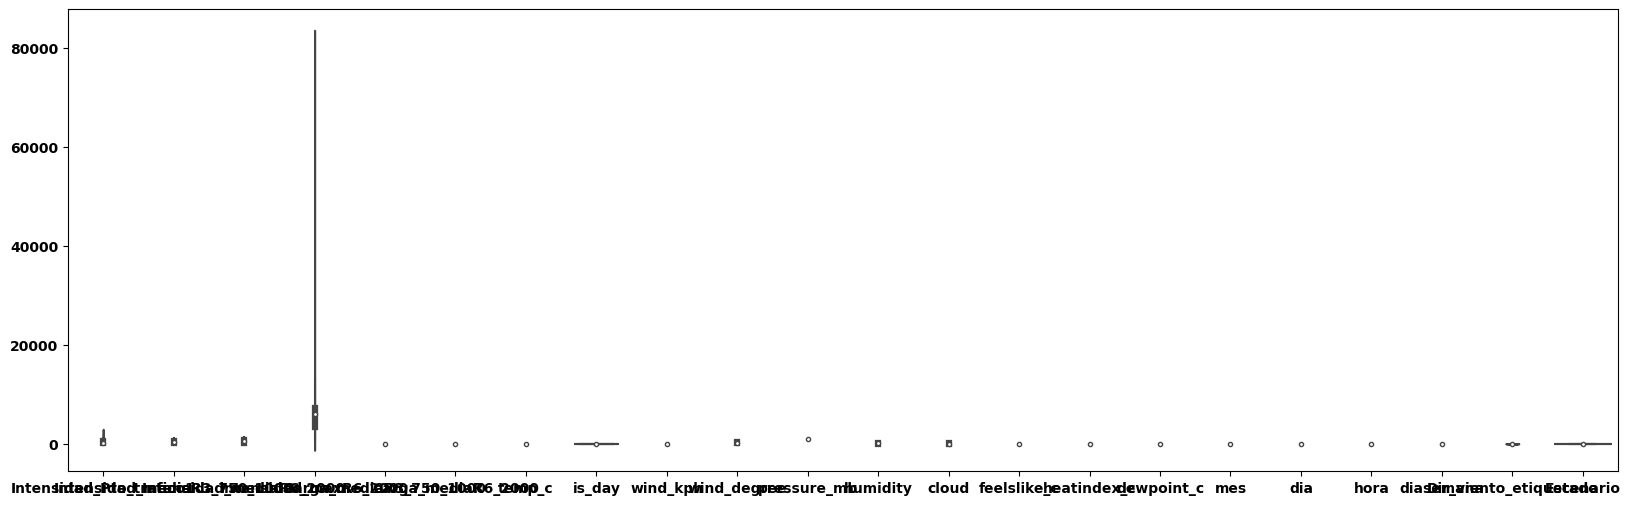

In [47]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_aire_calidad, orient='v')
plt.show()

### **Paso 1.**  Obtención y preparación de datos

In [138]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

Se puede observar la necesidad de llevar todas las variables de entrada a una escala estándar.

In [139]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[-0.5045324 ,  0.36345047, -0.62442593, ..., -1.65524844,
        -1.4802213 , -0.62497878],
       [-0.49155757,  0.42332459, -0.70644768, ..., -1.51105592,
        -1.4802213 , -0.62497878],
       [-0.6161159 ,  0.09046836, -0.95525992, ..., -1.36686339,
        -1.4802213 , -0.62497878],
       ...,
       [ 0.54837473,  1.77574393,  1.28114448, ...,  0.94021699,
         0.51171389, -0.62497878],
       [ 0.44133242,  1.7650767 ,  1.29809586, ...,  1.08440952,
         0.51171389,  1.3303477 ],
       [ 0.32131528,  1.42944097,  1.09009384, ...,  1.22860204,
         0.51171389, -1.60264202]])

In [140]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,Intensidad_Pto_trafico1,Intensidad_mediaR3_750_1000,Intensidad_mediaR6_2000,Intensidad_maxR6_2000,Carga_mediaR3_750_1000,Carga_mediaR6_2000,temp_c,is_day,wind_kph,wind_degree,...,humidity,cloud,feelslike_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,-0.504532,0.363450,-0.624426,-0.470372,-0.374101,-0.601150,1.547437,-0.896243,0.591882,-1.426867,...,-0.222589,-0.954589,1.541068,1.539524,1.862766,0.955749,-1.695822,-1.655248,-1.480221,-0.624979
1,-0.491558,0.423325,-0.706448,-0.527950,-0.295892,-0.699351,1.481942,-0.896243,0.556608,-1.446481,...,-0.114335,-0.954589,1.484292,1.474047,1.906881,0.955749,-1.695822,-1.511056,-1.480221,-0.624979
2,-0.616116,0.090468,-0.955260,-0.610057,-0.382655,-0.920615,1.400073,-0.896243,0.509577,-1.456288,...,-0.006080,-0.954589,1.413322,1.392201,1.928939,0.955749,-1.695822,-1.366863,-1.480221,-0.624979
3,-0.722509,-0.226839,-1.138612,-0.522612,-0.617284,-1.093975,1.334578,-0.896243,0.474303,-1.466095,...,0.102174,-0.954589,1.356545,1.326724,1.973054,0.955749,-1.695822,-1.222671,-1.480221,-0.624979
4,-0.732889,-0.522403,-1.257917,-0.522044,-0.794477,-1.230477,1.301830,-0.896243,0.297933,-1.466095,...,0.102174,-0.630336,1.328157,1.293985,1.928939,0.955749,-1.695822,-1.078478,-1.480221,-0.624979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.449766,1.154392,1.066918,-0.032011,0.385560,1.118231,0.090169,1.115769,-0.148871,1.456351,...,-1.684019,-0.807201,0.121661,0.082661,-2.085551,-0.889883,0.710630,0.651832,0.511714,-0.624979
49250,0.385541,1.449373,1.227311,-0.009042,0.612462,1.405364,-0.089943,1.115769,0.074531,1.485772,...,-1.521638,-0.807201,-0.105445,-0.097401,-1.997320,-0.889883,0.710630,0.796024,0.511714,-0.624979
49251,0.548375,1.775744,1.281144,-0.088822,0.777935,1.482056,-0.286428,1.115769,0.297933,1.524999,...,-1.359257,-0.807201,-0.346744,-0.293832,-1.909090,-0.889883,0.710630,0.940217,0.511714,-0.624979
49252,0.441332,1.765077,1.298096,-0.082576,0.751496,1.518826,-0.450166,1.115769,0.215627,0.446244,...,-1.196876,-0.807201,-0.502879,-0.457524,-1.842917,-0.889883,0.710630,1.084410,0.511714,1.330348


In [51]:
X_normal.describe().round(4)

,Intensidad_Pto_trafico1,Intensidad_mediaR3_750_1000,Intensidad_mediaR6_2000,Intensidad_maxR6_2000,Carga_mediaR3_750_1000,Carga_mediaR6_2000,temp_c,is_day,wind_kph,wind_degree,...,humidity,cloud,feelslike_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
count,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,...,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.9042,-1.4154,-1.5648,-0.7981,-1.5263,-1.5473,-1.8419,-0.8962,-1.4305,-1.8388,...,-2.5501,-0.9546,-1.8087,-1.8489,-3.1223,-1.1206,-1.6958,-1.6552,-1.4802,-1.6026
25%,-0.7446,-0.9024,-1.0204,-0.5001,-0.9283,-1.0102,-0.7285,-0.8962,-0.7250,-0.9954,...,-0.7639,-0.8662,-0.7584,-0.7358,-0.7180,-0.8899,-0.8937,-0.9343,-0.9822,-0.6250
50%,-0.3625,-0.1368,0.1641,-0.1913,-0.0736,0.1129,-0.2046,-0.8962,-0.2547,0.3678,...,-0.0061,-0.4240,-0.2048,-0.2120,-0.0121,-0.4285,0.0231,-0.0691,0.0137,0.3527
75%,0.3330,0.7970,0.8980,-0.0571,0.8102,0.9037,0.4995,1.1158,0.4978,0.7086,...,0.7517,0.8435,0.6185,0.5083,0.7378,1.1865,0.8252,0.7960,1.0097,0.3527
max,6.4766,2.9020,3.3454,8.3764,4.4604,2.0954,3.5942,1.1158,4.9188,1.6819,...,2.1590,1.9932,3.0173,3.2419,3.0980,1.4172,1.7420,1.6612,1.5077,1.3303


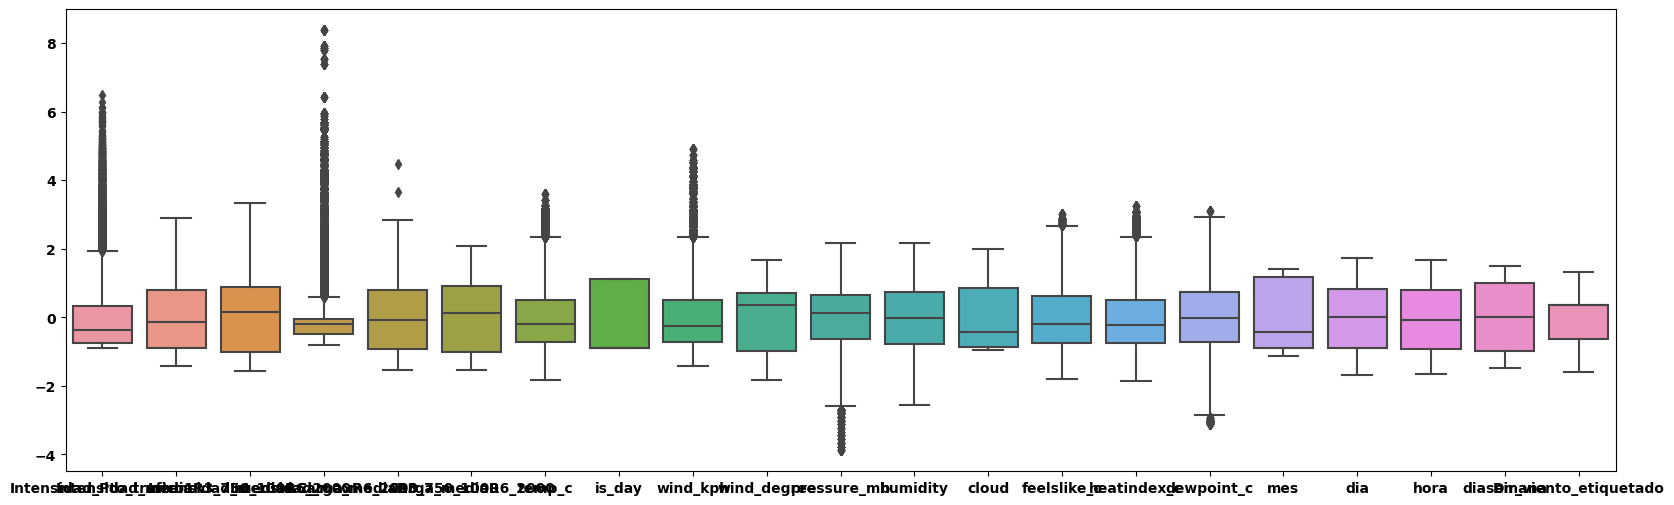

In [52]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

### **Paso 2.**  Dividir el dataset en Training y Test

In [141]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [142]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

39403
9851


49254

### **Paso 3.** Cargar y elegir el modelo de regresión logística

In [143]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

### **Paso 4.** Entrenar el modelo de regresión logística con los datos de entrenamiento

In [144]:
# Entrenar el modelo
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

Ahora que el modelo está entrenado, sacamos las predicciones, analizamos los resultados y obtenemos algunas métricas del modelo basadas en el conjunto de datos de prueba. Según las métricas, podremos observar si el modelo clasificó correctamente todas los niveles definidos de la calidad del aire.

### **Paso 5.** Obtener las predicciones 

In [145]:
# Calcular las predicciones con el conjunto de prueba
y_pred = log_r.predict(X_test)

In [146]:
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

[0 1 1 ... 1 1 1]


### **Paso 6.** Evaluación del modelo a través de sus métricas

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7897675362907319

Existen otra serie de metricas para calificar los modelos de clasificación que se detallan a continuación. Algunas de estas medidas se resumen en un informe llamado **classification_report**.

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      3195
           1       0.82      0.89      0.85      6656

    accuracy                           0.79      9851
   macro avg       0.77      0.74      0.75      9851
weighted avg       0.78      0.79      0.78      9851



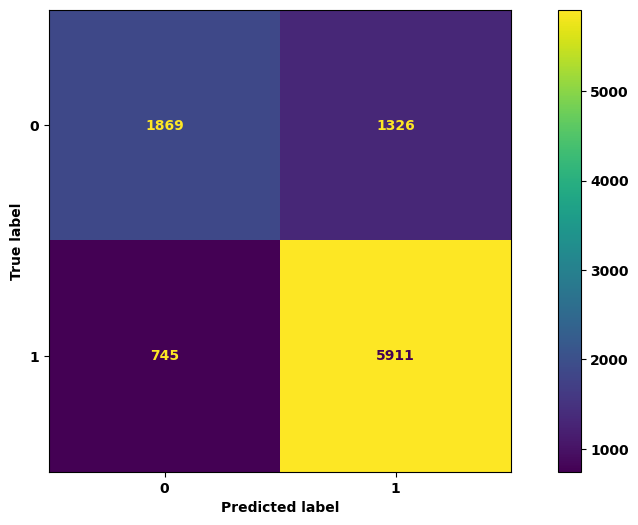

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

In [150]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7365237196415673

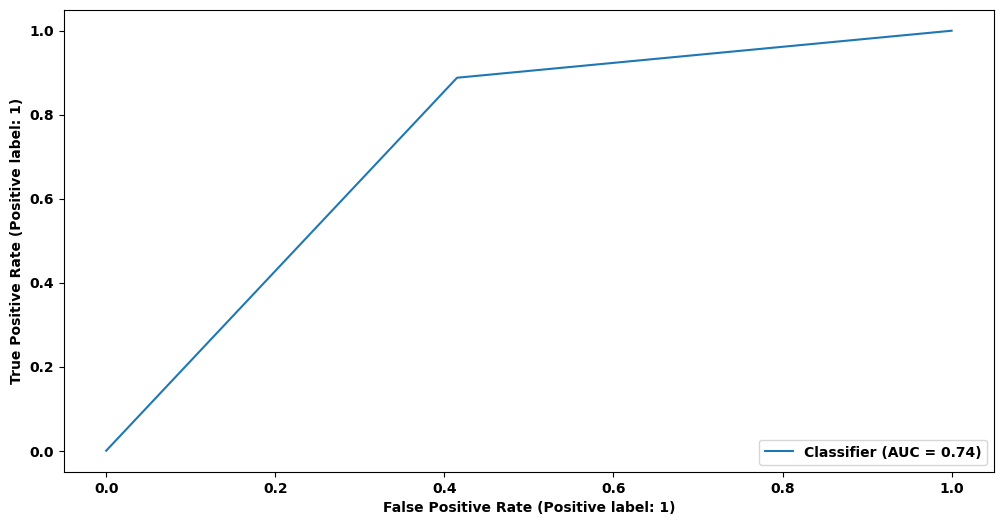

In [151]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

---

### **`Ejercicio 13`**

Vamos a realizar un **planteamiento ligeramente distinto** para el mismo ejercicio desarrollado en esta sesión. Posteriormente analizamos el rendimiento del nuevo clasificador (todavía del tipo *logit*):

**`13.1`** __Features__: Define una nueva lista de variables no muy importantes y filtra las variables originales, tratadas y almacenadas en un paso anterior como __`df_air_filt4`__, ésta vez para quedarnos con el conjunto de características que componen el `95%` de la información necesaria para modelizar y estimar la variable objetivo.

**`13.2`** __Target__: Crea mediante un nuevo planteamiento una variable de salida que clasifique solamente la calidad del aire por debajo del primer cuartil (__Q1__).

**`13.3`** __Scaler__: Aplica un escalamiento diferente para llevar ésta vez a todos los datos **a una escala entre 0 y 1**. 

**`13.4`** Crea un nuevo detector usando el método de _regresión logística_ con el nuevo tratamiento y estos nuevos conjuntos de variables de entrada y de salida. Consulta todas las metricas y visualiza las gráficas que muestran el rendimiento del modelo resultante y explica si se puede elegir a este como un buen clasificador de calidad del aire de Madrid en comparación con el anterior modelo desarrollado en la sesión!!

In [175]:
## Solución
# Ejercicio 13.1
variables_modelo = importancia.loc[importancia['imp_acum']>0.95].index.to_list()

In [176]:
## Solución
# Ejercicio 13.2
df_air_filt5 = df_air_filt4.drop(labels=variables_modelo, axis='columns')
df_aire_calidad_modelo = df_air_filt5.copy()
df_aire_calidad_modelo["Escenario"] = np.where(df_aire_calidad_modelo['Calidad_NO2']<df_aire_calidad_modelo['Calidad_NO2'].quantile(0.25),0,1)

df_aire_calidad_modelo.drop(['Calidad_NO2'], axis='columns', inplace=True)
df_aire_calidad_modelo

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
0,635,60.589582,154.00,697.00,259.00,847.00,845.00,46.00,6.00,493.727273,...,21.0,21.0,21.0,10.9,10,1,0,1,1,1
1,635,60.589582,159.00,753.00,282.00,854.00,929.00,48.00,8.00,500.659091,...,20.6,20.6,20.6,11.1,10,1,1,1,1,1
2,635,60.589582,111.00,851.00,235.00,678.00,1056.00,41.00,5.00,458.159091,...,20.1,20.1,20.1,11.2,10,1,2,1,1,1
3,635,60.589582,70.00,557.00,150.00,511.00,719.00,33.00,4.00,338.454545,...,19.7,19.7,19.7,11.4,10,1,3,1,1,0
4,635,60.589582,66.00,532.00,167.00,439.00,632.00,25.00,5.00,282.681818,...,19.5,19.5,19.5,11.2,10,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,599,323.225854,521.75,882.50,1427.00,113.75,1166.50,14.25,45.50,601.100000,...,11.0,11.0,12.1,-7.0,2,22,16,5,1,1
49250,599,323.225854,497.00,1001.75,1413.75,135.00,1144.25,18.25,45.75,641.575000,...,9.4,9.4,11.0,-6.6,2,22,17,5,1,1
49251,599,323.225854,559.75,1085.75,1487.50,138.25,1206.25,20.00,48.25,699.375000,...,7.7,7.7,9.8,-6.2,2,22,18,5,1,1
49252,599,323.225854,518.50,1024.75,1535.75,139.00,1224.25,19.25,49.75,673.100000,...,6.6,6.6,8.8,-5.9,2,22,19,5,3,1


In [177]:
## Solución
# Ejercicio 13.3

# Variables independientes (features)
X_modelo = df_aire_calidad_modelo.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y_modelo = df_aire_calidad_modelo['Escenario']
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X_modelo)
dataset_normal = escalado.transform(X_modelo)
dataset_normal
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal_modelo = pd.DataFrame(dataset_normal, columns=X_modelo.columns)
print(type(X_normal_modelo))
X_normal_modelo

<class 'pandas.core.frame.DataFrame'>


,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,0.330275,0.034068,0.054144,0.357436,0.008447,0.271322,0.366277,0.4600,0.0600,0.186757,...,0.00,0.694118,0.653740,0.665595,0.801418,0.818182,0.0,0.000000,0.000000,0.333333
1,0.330275,0.034068,0.055902,0.386154,0.009198,0.273565,0.402687,0.4800,0.0800,0.189393,...,0.00,0.682353,0.642659,0.652733,0.808511,0.818182,0.0,0.043478,0.000000,0.333333
2,0.330275,0.034068,0.039026,0.436410,0.007665,0.217186,0.457737,0.4100,0.0500,0.173235,...,0.00,0.667647,0.628809,0.636656,0.812057,0.818182,0.0,0.086957,0.000000,0.333333
3,0.330275,0.034068,0.024611,0.285641,0.004892,0.163690,0.311660,0.3300,0.0400,0.127725,...,0.00,0.655882,0.617729,0.623794,0.819149,0.818182,0.0,0.130435,0.000000,0.333333
4,0.330275,0.034068,0.023205,0.272821,0.005447,0.140626,0.273949,0.2500,0.0500,0.106521,...,0.11,0.650000,0.612188,0.617363,0.812057,0.818182,0.0,0.173913,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.000000,0.765198,0.183440,0.452564,0.046543,0.036438,0.505635,0.1425,0.4550,0.227579,...,0.05,0.400000,0.376731,0.379421,0.166667,0.090909,0.7,0.695652,0.666667,0.333333
49250,0.000000,0.765198,0.174739,0.513718,0.046111,0.043245,0.495990,0.1825,0.4575,0.242967,...,0.05,0.352941,0.332410,0.344051,0.180851,0.090909,0.7,0.739130,0.666667,0.333333
49251,0.000000,0.765198,0.196801,0.556795,0.048516,0.044286,0.522865,0.2000,0.4825,0.264942,...,0.05,0.302941,0.285319,0.305466,0.195035,0.090909,0.7,0.782609,0.666667,0.333333
49252,0.000000,0.765198,0.182298,0.525513,0.050090,0.044526,0.530668,0.1925,0.4975,0.254952,...,0.05,0.270588,0.254848,0.273312,0.205674,0.090909,0.7,0.826087,0.666667,1.000000


In [178]:
## Solución
## Ejercicio 13.4
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train_modelo, X_test_modelo, y_train_modelo, y_test_modelo = train_test_split(X_normal_modelo, y_modelo, test_size=0.2, random_state=88)
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r_model = LogisticRegression(max_iter=1000,
                           random_state=100)
# Entrenar el modelo
log_r_model.fit(X_train_modelo, y_train_modelo)
# Calcular las predicciones con el conjunto de prueba
y_pred_modelo = log_r_model.predict(X_test_modelo)
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred_modelo)


[1 1 1 ... 1 1 1]


Metricas de rendimiento del modelo vs metricas del modelo anterior

In [179]:
from sklearn.metrics import accuracy_score
print("ACCURENCY SCORE MODELO NUEVO\n",accuracy_score(y_test_modelo, y_pred_modelo))
print("ACCURENCY SCORE MODELO ANTERIOR\n",accuracy_score(y_test, y_pred))

ACCURENCY SCORE MODELO NUEVO
 0.8402192670794844
ACCURENCY SCORE MODELO ANTERIOR
 0.7897675362907319


In [180]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT MODELO NUEVO\n",classification_report(y_test_modelo, y_pred_modelo))
print("CLASSIFICATION REPORT MODELO ANTERIOR\n",classification_report(y_test, y_pred))

CLASSIFICATION REPORT MODELO NUEVO
               precision    recall  f1-score   support

           0       0.74      0.54      0.62      2404
           1       0.86      0.94      0.90      7447

    accuracy                           0.84      9851
   macro avg       0.80      0.74      0.76      9851
weighted avg       0.83      0.84      0.83      9851

CLASSIFICATION REPORT MODELO ANTERIOR
               precision    recall  f1-score   support

           0       0.71      0.58      0.64      3195
           1       0.82      0.89      0.85      6656

    accuracy                           0.79      9851
   macro avg       0.77      0.74      0.75      9851
weighted avg       0.78      0.79      0.78      9851



In [181]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
print("ROC AUC SCORE MODELO NUEVO\n",roc_auc_score(y_test_modelo, y_pred_modelo))
print("ROC AUC SCORE MODELO ANTERIOR\n",roc_auc_score(y_test, y_pred))

ROC AUC SCORE MODELO NUEVO
 0.7381221363078903
ROC AUC SCORE MODELO ANTERIOR
 0.7365237196415673


Graficas del modelo vs Graficas del modelo anterior

GRAFICA DE CONFUSION MODELO NUEVO



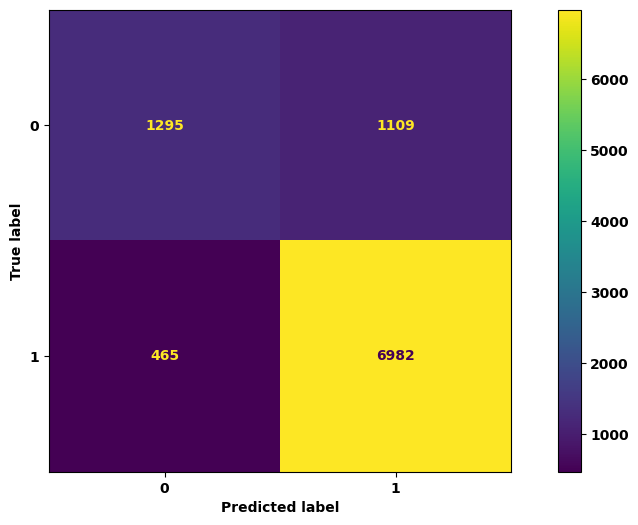

In [182]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("GRAFICA DE CONFUSION MODELO NUEVO\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_modelo, y_pred_modelo),
                               display_labels=log_r_model.classes_)
disp.plot()

plt.show()

GRAFICA DE CONFUSION MODELO ANTERIOR



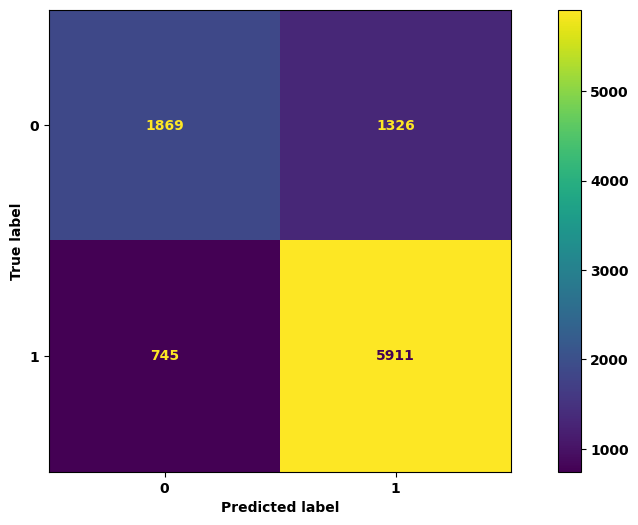

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("GRAFICA DE CONFUSION MODELO ANTERIOR\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

GRAFICA CURVA ROC MODELO NUEVO



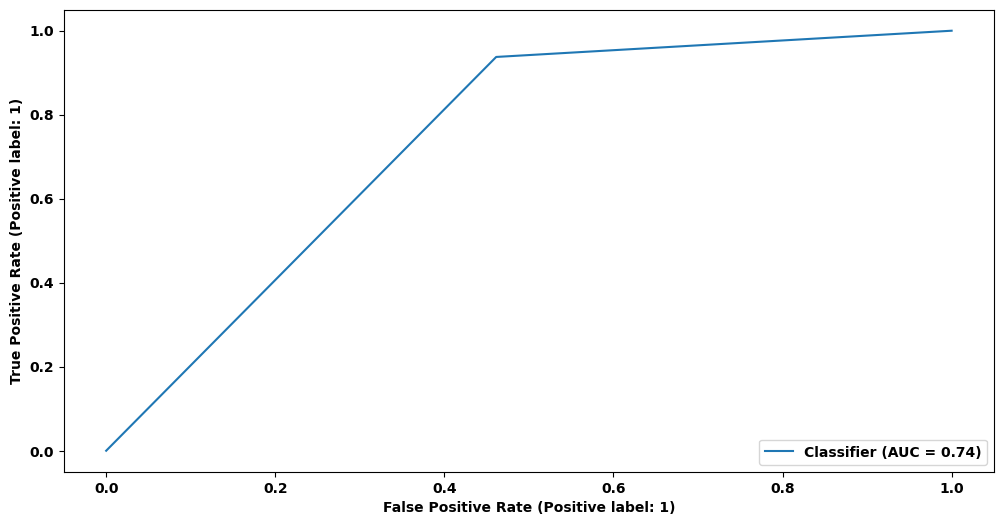

In [184]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
print("GRAFICA CURVA ROC MODELO NUEVO\n")
RocCurveDisplay.from_predictions(y_test_modelo, y_pred_modelo)

plt.show()

GRAFICA CURVA ROC MODELO ANTERIOR



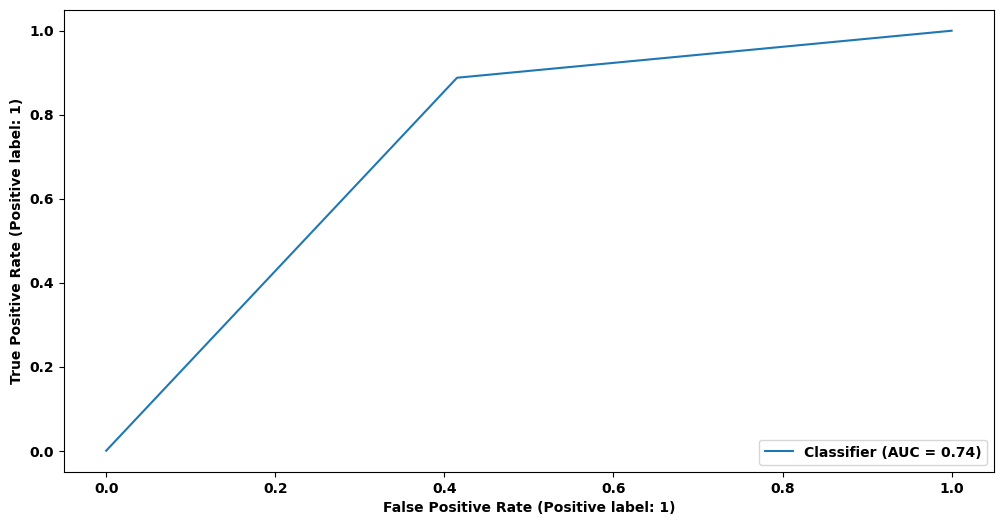

In [185]:
from sklearn.metrics import RocCurveDisplay
print("GRAFICA CURVA ROC MODELO ANTERIOR\n")
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

Como podemos observar viendo las metricas y graficas,yo pienso que este modelo si podria ser elegido como clasificador de aire de madrid respecto al modelo anterior ya que tenemos resultados ligeramente mejores,en la metrica accurency score hay una diferencia de 0,050,en la metrica de clasificacion la precision es 0,03 mejor y en la metrica roc auc score es practicamente igual,varia muy poco y no se ve una diferencia notoria.
Ya con tan solo que la precision sea mejor que en el anterior modelo,yo considero que seria mejor modelo de clasificacion para determinar la calidad del aire.